# Taxi demand prediction in New York City


In [1]:
%matplotlib inline

#Importing Libraries
# pip3 install graphviz
#pip3 install dask
#pip3 install toolz
#pip3 install cloudpickle
# https://www.youtube.com/watch?v=ieW3G7ZzRZ0
# https://github.com/dask/dask-tutorial
# please do go through this python notebook: https://github.com/dask/dask-tutorial/blob/master/07_dataframe.ipynb
import dask.dataframe as dd#similar to pandas

import pandas as pd#pandas to create small dataframes 

# pip3 install foliun
# if this doesnt work refere install_folium.JPG in drive
import folium #open street map

# unix time: https://www.unixtimestamp.com/
import datetime #Convert to unix time

import time #Convert to unix time

# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays

# matplotlib: used to plot graphs
import matplotlib
# matplotlib.use('nbagg') : matplotlib uses this protocall which makes plots more user intractive like zoom in and zoom out
matplotlib.use('nbagg')
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  

# this lib is used while we calculate the stight line distance between two (lat,lon) pairs in miles
import gpxpy.geo #Get the haversine distance

from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os

# download migwin: https://mingw-w64.org/doku.php/download/mingw-builds
# install it in your system and keep the path, migw_path ='installed path'
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

# to install xgboost: pip3 install xgboost
# if it didnt happen check install_xgboost.JPG
import xgboost as xgb

# to install sklearn: pip install -U scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

# Data Information

<p>
Ge the data from : http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml (2016 data)
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) 
</p>

## Information on taxis:

<h5> Yellow Taxi: Yellow Medallion Taxicabs</h5>
<p> These are the famous NYC yellow taxis that provide transportation exclusively through street-hails. The number of taxicabs is limited by a finite number of medallions issued by the TLC. You access this mode of transportation by standing in the street and hailing an available taxi with your hand. The pickups are not pre-arranged.</p>

<h5> For Hire Vehicles (FHVs) </h5>
<p> FHV transportation is accessed by a pre-arrangement with a dispatcher or limo company. These FHVs are not permitted to pick up passengers via street hails, as those rides are not considered pre-arranged. </p>

<h5> Green Taxi: Street Hail Livery (SHL) </h5>
<p>  The SHL program will allow livery vehicle owners to license and outfit their vehicles with green borough taxi branding, meters, credit card machines, and ultimately the right to accept street hails in addition to pre-arranged rides. </p>
<p> Credits: Quora</p>

<h5>Footnote:</h5>
In the given notebook we are considering only the yellow taxis for the time period between Jan - Mar 2015 & Jan - Mar 2016

# Data Collection
We Have collected all yellow taxi trips data from jan-2015 to dec-2016(Will be using only 2015 data)
<table>
<tr>
<th> file name </th>
<th> file name size</th>
<th> number of records </th>
<th> number of features </th>
</tr>
<tr>
<td> yellow_tripdata_2016-01 </td>
<td> 1. 59G </td>
<td> 10906858 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-02 </td>
<td> 1. 66G </td>
<td> 11382049 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-03 </td>
<td> 1. 78G </td>
<td> 12210952 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-04 </td>
<td> 1. 74G </td>
<td> 11934338 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-05 </td>
<td> 1. 73G </td>
<td> 11836853 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-06 </td>
<td> 1. 62G </td>
<td> 11135470 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-07 </td>
<td> 884Mb </td>
<td> 10294080 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-08 </td>
<td> 854Mb </td>
<td> 9942263 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-09 </td>
<td> 870Mb </td>
<td> 10116018 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-10 </td>
<td> 933Mb </td>
<td> 10854626 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-11 </td>
<td> 868Mb </td>
<td> 10102128 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-12 </td>
<td> 897Mb </td>
<td> 10449408 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-01 </td>
<td> 1.84Gb </td>
<td> 12748986 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-02 </td>
<td> 1.81Gb </td>
<td> 12450521 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-03 </td>
<td> 1.94Gb </td>
<td> 13351609 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-04 </td>
<td> 1.90Gb </td>
<td> 13071789 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-05 </td>
<td> 1.91Gb </td>
<td> 13158262 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-06 </td>
<td> 1.79Gb </td>
<td> 12324935 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-07 </td>
<td> 1.68Gb </td>
<td> 11562783 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-08 </td>
<td> 1.62Gb </td>
<td> 11130304 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-09 </td>
<td> 1.63Gb </td>
<td> 11225063 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-10 </td>
<td> 1.79Gb </td>
<td> 12315488 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-11 </td>
<td> 1.65Gb </td>
<td> 11312676 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-12 </td>
<td> 1.67Gb </td>
<td> 11460573 </td>
<td> 19 </td>
</tr>
</table>

# Assignment

        

In [310]:
'''
Task 1: Incorporate Fourier features as features into Regression models and measure MAPE. <br>

Task 2: Perform hyper-parameter tuning for Regression models.
        2a. Linear Regression: Grid Search
        2b. Random Forest: Random Search 
        2c. Xgboost: Random Search
Task 3: Explore more time-series features using Google search/Quora/Stackoverflow
to reduce the MAPE to < 12%
'''

'\nTask 1: Incorporate Fourier features as features into Regression models and measure MAPE. <br>\n\nTask 2: Perform hyper-parameter tuning for Regression models.\n        2a. Linear Regression: Grid Search\n        2b. Random Forest: Random Search \n        2c. Xgboost: Random Search\nTask 3: Explore more time-series features using Google search/Quora/Stackoverflow\nto reduce the MAPE to < 12%\n'

## Task 1 and 2 : Incorporate Fourier features as features into Regression models and measure and hyper parameter tuning

In [49]:
from scipy import vstack,hstack

# top 5 amplitute of each month of each cluster/region 
# features---> 'A1' , 'A2' , 'A3' , 'A4' , 'A5' , 'F1' , 'F2' , 'F3' , 'F4' , 'F5'
fourier_feature = [] 
for i in range(40):
    
        jan_fft_amp_top5_feat= sorted(np.fft.fft(np.array(regions_cum[i][:4464])), reverse=True)[:5]
        jan_fft_freq_top5_feat = sorted(np.fft.fftfreq(4464), reverse=True)[:5]  
        clust_jan_frq_amp = [np.hstack([jan_fft_amp_top5_feat,jan_fft_freq_top5_feat]).astype(np.float)] * (4464 - 5) # removing first five 10_min_bins(50 mins)
           
        
        feb_fft_amp_top5_feat = sorted(np.fft.fft(np.array(regions_cum[i][4464:4464+4176])), reverse=True)[:5]
        feb_fft_freq_top5_feat = sorted(np.fft.fftfreq(4176), reverse=True)[:5]  
        clust_feb_frq_amp = [np.hstack([feb_fft_amp_top5_feat,feb_fft_freq_top5_feat]).astype(np.float)] * 4176
        
        
        mar_fft_amp_top5_feat = sorted(np.fft.fft(np.array(regions_cum[i][4464+4176: ])), reverse=True)[:5]
        mar_fft_freq_top5_feat = sorted(np.fft.fftfreq(4176), reverse=True)[:5]  
        clust_mar_frq_amp = [np.hstack([mar_fft_amp_top5_feat,mar_fft_freq_top5_feat]).astype(np.float)] * 4464
        
        fourier_feature.extend(np.vstack([clust_jan_frq_amp, clust_feb_frq_amp, clust_mar_frq_amp]))

## Regression Models

### Train-Test Split
Before we start predictions using the tree based regression models we take 3 months of 2016 pickup data and split it such that for every region we have 70% data in train and 30% in test, ordered date-wise for every region

In [50]:
# train, test split : 70% 30% split
# Before we start predictions using the tree based regression models we take 3 months of 2016 pickup data 
# and split it such that for every region we have 70% data in train and 30% in test,
# ordered date-wise for every region
print("size of train data :", int(13099*0.7))
print("size of test data :", int(13099*0.3))

size of train data : 9169
size of test data : 3929


In [51]:
# extracting first 9169 timestamp values i.e 70% of 13099 (total timestamps) for our training data
train_features =  [tsne_feature[i*13099:(13099*i+9169)] for i in range(0,40)]
# temp = [0]*(12955 - 9068)
test_features = [tsne_feature[(13099*(i))+9169:13099*(i+1)] for i in range(0,40)]

In [52]:
print("Number of data clusters",len(train_features), "Number of data points in trian data", len(train_features[0]), "Each data point contains", len(train_features[0][0]),"features")
print("Number of data clusters",len(train_features), "Number of data points in test data", len(test_features[0]), "Each data point contains", len(test_features[0][0]),"features")

Number of data clusters 40 Number of data points in trian data 9169 Each data point contains 5 features
Number of data clusters 40 Number of data points in test data 3930 Each data point contains 5 features


In [53]:
# train and test split of fourier transform feature
# extracting first 9169 timestamp values i.e 70% of 13099 (total timestamps) for our training data
train_fft_features =  [fourier_feature[i*13099:(13099*i+9169)] for i in range(0,40)]
# temp = [0]*(12955 - 9068)
test_fft_features = [fourier_feature[(13099*(i))+9169:13099*(i+1)] for i in range(0,40)]

In [54]:
# extracting first 9169 timestamp values i.e 70% of 13099 (total timestamps) for our training data
tsne_train_flat_lat = [i[:9169] for i in tsne_lat]
tsne_train_flat_lon = [i[:9169] for i in tsne_lon]
tsne_train_flat_weekday = [i[:9169] for i in tsne_weekday]
tsne_train_flat_output = [i[:9169] for i in output]
tsne_train_flat_exp_avg = [i[:9169] for i in predict_list]

In [55]:
# extracting the rest of the timestamp values i.e 30% of 12956 (total timestamps) for our test data
tsne_test_flat_lat = [i[9169:] for i in tsne_lat]
tsne_test_flat_lon = [i[9169:] for i in tsne_lon]
tsne_test_flat_weekday = [i[9169:] for i in tsne_weekday]
tsne_test_flat_output = [i[9169:] for i in output]
tsne_test_flat_exp_avg = [i[9169:] for i in predict_list]

In [56]:
# the above contains values in the form of list of lists (i.e. list of values of each region), here we make all of them in one list
train_new_features = []
for i in range(0,40):
    train_new_features.extend(train_features[i])
test_new_features = []
for i in range(0,40):
    test_new_features.extend(test_features[i])
    
# fourier transformed feature
# the above contains values in the form of list of lists (i.e. list of values of each region), here we make all of them in one list for fourier transformed feature
train_new_fft_features = []
for i in range(0,40):
    train_new_fft_features.extend(train_fft_features[i])
test_new_fft_features = []
for i in range(0,40):
    test_new_fft_features.extend(test_fft_features[i])   
    

In [57]:
# converting lists of lists into sinle list i.e flatten
# a  = [[1,2,3,4],[4,6,7,8]]
# print(sum(a,[]))
# [1, 2, 3, 4, 4, 6, 7, 8]

tsne_train_lat = sum(tsne_train_flat_lat, [])
tsne_train_lon = sum(tsne_train_flat_lon, [])
tsne_train_weekday = sum(tsne_train_flat_weekday, [])
tsne_train_output = sum(tsne_train_flat_output, [])
tsne_train_exp_avg = sum(tsne_train_flat_exp_avg,[])

In [58]:
# converting lists of lists into sinle list i.e flatten
# a  = [[1,2,3,4],[4,6,7,8]]
# print(sum(a,[]))
# [1, 2, 3, 4, 4, 6, 7, 8]

tsne_test_lat = sum(tsne_test_flat_lat, [])
tsne_test_lon = sum(tsne_test_flat_lon, [])
tsne_test_weekday = sum(tsne_test_flat_weekday, [])
tsne_test_output = sum(tsne_test_flat_output, [])
tsne_test_exp_avg = sum(tsne_test_flat_exp_avg,[])

In [59]:
# Preparing the data frame for our train data
columns = ['ft_5','ft_4','ft_3','ft_2','ft_1',"amp1", "amp2", "amp3", "amp4", "amp5", "freq1", "freq2", "freq3", "freq4", "freq5"]
df_train = pd.DataFrame(data=np.hstack([train_new_features,train_new_fft_features]), columns=columns) 
df_train['lat'] = tsne_train_lat
df_train['lon'] = tsne_train_lon
df_train['weekday'] = tsne_train_weekday
df_train['exp_avg'] = tsne_train_exp_avg

print(df_train.shape)
df_train.head()

(366760, 19)


,ft_5,ft_4,ft_3,ft_2,ft_1,amp1,amp2,amp3,amp4,amp5,freq1,freq2,freq3,freq4,freq5,lat,lon,weekday,exp_avg
0,0.0,0.0,0.0,0.0,0.0,367173.0,94490.188858,94490.188858,14349.849101,14349.849101,0.499776,0.499552,0.499328,0.499104,0.49888,40.776228,-73.982119,4,0
1,0.0,0.0,0.0,0.0,0.0,367173.0,94490.188858,94490.188858,14349.849101,14349.849101,0.499776,0.499552,0.499328,0.499104,0.49888,40.776228,-73.982119,4,0
2,0.0,0.0,0.0,0.0,0.0,367173.0,94490.188858,94490.188858,14349.849101,14349.849101,0.499776,0.499552,0.499328,0.499104,0.49888,40.776228,-73.982119,4,0
3,0.0,0.0,0.0,0.0,0.0,367173.0,94490.188858,94490.188858,14349.849101,14349.849101,0.499776,0.499552,0.499328,0.499104,0.49888,40.776228,-73.982119,4,0
4,0.0,0.0,0.0,0.0,0.0,367173.0,94490.188858,94490.188858,14349.849101,14349.849101,0.499776,0.499552,0.499328,0.499104,0.49888,40.776228,-73.982119,4,0


In [60]:
# Preparing the data frame for our train data
df_test = pd.DataFrame(data=np.hstack([test_new_features,test_new_fft_features]), columns=columns) 
df_test['lat'] = tsne_test_lat
df_test['lon'] = tsne_test_lon
df_test['weekday'] = tsne_test_weekday
df_test['exp_avg'] = tsne_test_exp_avg
print(df_test.shape)

(157200, 19)


In [61]:
df_test.head()

,ft_5,ft_4,ft_3,ft_2,ft_1,amp1,amp2,amp3,amp4,amp5,freq1,freq2,freq3,freq4,freq5,lat,lon,weekday,exp_avg
0,143.0,145.0,119.0,113.0,124.0,387761.0,91160.781939,91160.781939,17509.351171,17509.351171,0.499761,0.499521,0.499282,0.499042,0.498803,40.776228,-73.982119,4,121
1,145.0,119.0,113.0,124.0,121.0,387761.0,91160.781939,91160.781939,17509.351171,17509.351171,0.499761,0.499521,0.499282,0.499042,0.498803,40.776228,-73.982119,4,120
2,119.0,113.0,124.0,121.0,131.0,387761.0,91160.781939,91160.781939,17509.351171,17509.351171,0.499761,0.499521,0.499282,0.499042,0.498803,40.776228,-73.982119,4,127
3,113.0,124.0,121.0,131.0,110.0,387761.0,91160.781939,91160.781939,17509.351171,17509.351171,0.499761,0.499521,0.499282,0.499042,0.498803,40.776228,-73.982119,4,115
4,124.0,121.0,131.0,110.0,116.0,387761.0,91160.781939,91160.781939,17509.351171,17509.351171,0.499761,0.499521,0.499282,0.499042,0.498803,40.776228,-73.982119,4,115


### Using Linear Regression

In [390]:
## Hyper Parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

clf_lin_reg = Lasso(alpha=1.0)

param={'alpha':[0.001,0.01,0.1,1,10]}
gscv=GridSearchCV(estimator=clf_lin_reg, param_grid = param, scoring='neg_mean_absolute_error', n_jobs=-1,verbose=10)
gscv.fit(df_train, tsne_train_output)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:   22.2s remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:   32.0s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:   41.6s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   50.9s remaining:   44.5s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:   55.0s remaining:   27.5s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  1.1min remaining:   16.2s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=10)

In [397]:
print("Best Param: ",gscv.best_params_)
print("\nBest Score: ",-gscv.best_score_)

Best Param:  {'alpha': 0.001}

Best Score:  8.673587450397548


In [400]:
# Traning Using Optimal Parameter
from sklearn.linear_model import LinearRegression
lr_reg=Lasso(alpha=0.001).fit(df_train, tsne_train_output)

y_pred = lr_reg.predict(df_test)
lr_test_predictions = [round(value) for value in y_pred]
y_pred = lr_reg.predict(df_train)
lr_train_predictions = [round(value) for value in y_pred]

print("Test MAPE : ",(mean_absolute_error(tsne_test_output, lr_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))

Test MAPE :  0.1346818043304668


### Using Random Forest Regressor

In [404]:
## Hyper Parameter tuning using random search
from sklearn.model_selection import RandomizedSearchCV

clf_rf = RandomForestRegressor(max_features='sqrt',max_depth=None, n_estimators=40, n_jobs=-1)
param={'max_depth':[3,5,10,15,30],"n_estimators":[20,50,100,200,500]}

rscv= RandomizedSearchCV(estimator = clf_rf, param_distributions = param, scoring='neg_mean_absolute_error', n_jobs=-1,verbose=10)
rscv.fit(df_train, tsne_train_output)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  1.8min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  2.4min remaining:   44.0s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  2.7min remaining:   18.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.1min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=40, n_jobs=-1,
                                                   oob_score=False,
                                                   random_state=No

In [405]:
print("Best Param: ",rscv.best_params_)
print("\nBest Score: ",-rscv.best_score_)

Best Param:  {'n_estimators': 200, 'max_depth': 10}

Best Score:  8.707279030116073


In [409]:
#Traning Using Optimal Hyperparameter
regr1 = RandomForestRegressor(max_features='sqrt',max_depth=10, n_estimators=200, n_jobs=-1)
regr1.fit(df_train, tsne_train_output)

# Predicting on test data using our trained random forest model 

# the models regr1 is already hyper parameter tuned
# the parameters that we got above are found using grid search
y_pred = regr1.predict(df_test)
rndf_test_predictions = [round(value) for value in y_pred]
y_pred = regr1.predict(df_train)
rndf_train_predictions = [round(value) for value in y_pred]


print("Train MAPE : ",(mean_absolute_error(tsne_train_output, rndf_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
print("Test MAPE : ",(mean_absolute_error(tsne_test_output, rndf_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))

Train MAPE :  0.1368512323624647
Test MAPE :  0.1345528473427501


Index(['ft_5', 'ft_4', 'ft_3', 'ft_2', 'ft_1', 'amp1', 'amp2', 'amp3', 'amp4',
       'amp5', 'freq1', 'freq2', 'freq3', 'freq4', 'freq5', 'lat', 'lon',
       'weekday', 'exp_avg'],
      dtype='object')
[8.86960207e-02 1.07706847e-01 1.38791168e-01 2.02615824e-01
 1.76294874e-01 1.70238361e-02 6.54180559e-03 6.29633501e-03
 4.27791512e-03 4.23602924e-03 3.66332410e-05 3.21296205e-05
 3.49534810e-05 2.95853407e-05 2.67832446e-05 4.44513356e-04
 7.20698144e-04 1.67374390e-04 2.46026674e-01]


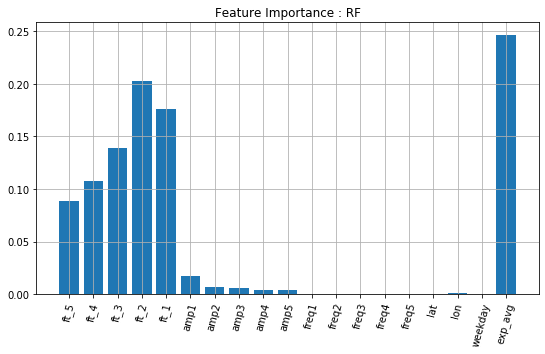

In [411]:
#feature importances based on analysis using random forest
print (df_train.columns)
print (regr1.feature_importances_)

plt.figure(figsize=(9,5))
plt.title("Feature Importance : RF")
plt.bar(df_train.columns,regr1.feature_importances_)
plt.xticks(np.arange(len(df_train.columns)),df_train.columns,rotation=75)
plt.grid()
plt.show()

### Using XgBoost Regressor

In [428]:
## Hyper Parameter tuning using random search
from sklearn.model_selection import RandomizedSearchCV

clf_xgb = xgb.XGBRegressor(learning_rate =0.1,n_estimators=1000,max_depth=3, nthread=-1)

param={'max_depth':[3,5,10,15,30],"n_estimators":[100,200,500,1000],"learning_rate":[1,0.1,0.01]}

rscv= RandomizedSearchCV(estimator = clf_xgb, param_distributions = param, scoring='neg_mean_absolute_error', n_jobs=1,verbose=10)
rscv.fit(df_train, tsne_train_output)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=200, max_depth=10, learning_rate=1 .................
[06:53:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_depth=10, learning_rate=1, score=-13.310, total=  25.6s
[CV] n_estimators=200, max_depth=10, learning_rate=1 .................
[06:53:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.6s remaining:    0.0s


[CV]  n_estimators=200, max_depth=10, learning_rate=1, score=-11.170, total=  26.1s
[CV] n_estimators=200, max_depth=10, learning_rate=1 .................
[06:53:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   51.7s remaining:    0.0s


[CV]  n_estimators=200, max_depth=10, learning_rate=1, score=-12.260, total=  25.7s
[CV] n_estimators=1000, max_depth=5, learning_rate=0.1 ...............
[06:54:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min remaining:    0.0s


[CV]  n_estimators=1000, max_depth=5, learning_rate=0.1, score=-9.384, total=  54.1s
[CV] n_estimators=1000, max_depth=5, learning_rate=0.1 ...............
[06:55:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.2min remaining:    0.0s


[CV]  n_estimators=1000, max_depth=5, learning_rate=0.1, score=-7.661, total=  55.5s
[CV] n_estimators=1000, max_depth=5, learning_rate=0.1 ...............
[06:56:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.1min remaining:    0.0s


[CV]  n_estimators=1000, max_depth=5, learning_rate=0.1, score=-9.207, total=  55.0s
[CV] n_estimators=200, max_depth=15, learning_rate=1 .................
[06:57:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  4.0min remaining:    0.0s


[CV]  n_estimators=200, max_depth=15, learning_rate=1, score=-13.210, total=  44.7s
[CV] n_estimators=200, max_depth=15, learning_rate=1 .................
[06:57:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  4.8min remaining:    0.0s


[CV]  n_estimators=200, max_depth=15, learning_rate=1, score=-11.520, total=  45.4s
[CV] n_estimators=200, max_depth=15, learning_rate=1 .................
[06:58:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  5.5min remaining:    0.0s


[CV]  n_estimators=200, max_depth=15, learning_rate=1, score=-12.466, total=  44.2s
[CV] n_estimators=1000, max_depth=3, learning_rate=0.1 ...............
[06:59:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  6.3min remaining:    0.0s


[CV]  n_estimators=1000, max_depth=3, learning_rate=0.1, score=-9.296, total=  34.5s
[CV] n_estimators=1000, max_depth=3, learning_rate=0.1 ...............
[06:59:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=1000, max_depth=3, learning_rate=0.1, score=-7.618, total=  35.1s
[CV] n_estimators=1000, max_depth=3, learning_rate=0.1 ...............
[07:00:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=1000, max_depth=3, learning_rate=0.1, score=-9.163, total=  34.5s
[CV] n_estimators=500, max_depth=30, learning_rate=1 .................
[07:01:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=500, max_depth=30, learning_rate=1, score=-12.971, total=  22.6s
[CV] n_estimators=500, max_depth=30, learning_rate=1 ..............

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 18.9min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=1000,
                                          n_jobs=1, nthread=-1,
                                          objective='reg:linear',
                                          rando...pha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                            

In [430]:
print("Best Param: ",rscv.best_params_)
print("\nBest Score: ",-rscv.best_score_)

Best Param:  {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}

Best Score:  8.627213474899476


In [431]:
# Traninng with optimal Hyperparameter

x_model = xgb.XGBRegressor(
 learning_rate =0.1,
 n_estimators=200,
 max_depth=5,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 reg_alpha=200, reg_lambda=200,
 colsample_bytree=0.8,nthread=4)

x_model.fit(df_train, tsne_train_output)

#predicting with our trained Xg-Boost regressor
# the models x_model is already hyper parameter tuned
# the parameters that we got above are found using grid search

y_pred = x_model.predict(df_test)
xgb_test_predictions = [round(value) for value in y_pred]
y_pred = x_model.predict(df_train)
xgb_train_predictions = [round(value) for value in y_pred]


print("Train MAPE : ",(mean_absolute_error(tsne_train_output, xgb_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
print("Test MAPE : ",(mean_absolute_error(tsne_test_output, xgb_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))

[07:13:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train MAPE :  0.13838850211637208
Test MAPE :  0.13360181329858015


<Figure size 648x360 with 0 Axes>

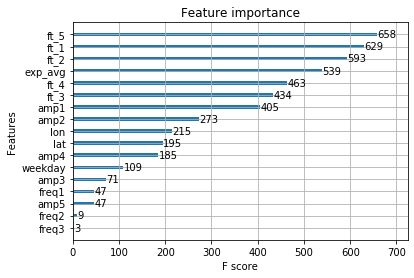

In [432]:
# Feature Importance of XGBoost Regressor
from xgboost import plot_importance
plt.figure(figsize=(9,5))
plot_importance(x_model,height=0.3)
plt.show()

### Calculating the error metric values for various models

In [433]:
train_mape=[]
test_mape=[]

train_mape.append((mean_absolute_error(tsne_train_output,df_train['ft_1'].values))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output,df_train['exp_avg'].values))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output, lr_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output,rndf_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output, xgb_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))


test_mape.append((mean_absolute_error(tsne_test_output, df_test['ft_1'].values))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, df_test['exp_avg'].values))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, lr_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, rndf_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, xgb_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))


### Error Metric Matrix

In [434]:
print ("Error Metric Matrix (Tree Based Regression Methods) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Baseline Model -                             Train: ",train_mape[0],"      Test: ",test_mape[0])
print ("Exponential Averages Forecasting -           Train: ",train_mape[1],"      Test: ",test_mape[1])
print ("Linear Regression -                         Train: ",train_mape[2],"      Test: ",test_mape[2])
print ("Random Forest Regression -                   Train: ",train_mape[3],"     Test: ",test_mape[3])
print ("XgBoost Regression -                         Train: ",train_mape[4],"      Test: ",test_mape[4])
print ("--------------------------------------------------------------------------------------------------------")

Error Metric Matrix (Tree Based Regression Methods) -  MAPE
--------------------------------------------------------------------------------------------------------
Baseline Model -                             Train:  0.14870666996426116       Test:  0.14225522601041551
Exponential Averages Forecasting -           Train:  0.14121603560900353       Test:  0.13490049942819257
Linear Regression -                         Train:  0.14219263664944806       Test:  0.1346818043304668
Random Forest Regression -                   Train:  0.1368512323624647      Test:  0.1345528473427501
XgBoost Regression -                         Train:  0.13838850211637208       Test:  0.13360181329858015
--------------------------------------------------------------------------------------------------------


## Task 3: Explore more time-series features using Google search/Quora/Stackoverflow to reduce the MAPE to < 12%

### Reference

 https://www.youtube.com/watch?v=DUyZl-abnNM   -- Holt double exponential smooting
 
 https://www.youtube.com/watch?v=mrLiC1biciY     -- Holt  winter tripple exponential smooting
 
 https://grisha.org/blog/2016/01/29/triple-exponential-smoothing-forecasting/  --- Code reference
 
 https://grisha.org/blog/2016/02/16/triple-exponential-smoothing-forecasting-part-ii/  --- Code reference
 
 https://grisha.org/blog/2016/02/17/triple-exponential-smoothing-forecasting-part-iii/  --- Code reference
 
 https://medium.com/datadriveninvestor/how-to-build-exponential-smoothing-models-using-python-simple-exponential-smoothing-holt-and-da371189e1a1 

###  3.1 Holt double exponential smoothing


 https://grisha.org/blog/2016/02/16/triple-exponential-smoothing-forecasting-part-ii/  --- Code reference

In [53]:
# Holt double exponential averaging
# given a series and alpha, return series of smoothed points
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # we are forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

In [54]:
# hyperparameter tuning

# removing top 5 values from each cluster for calculating MAPE and MSE
cumulative_test = [ regions_cum[i][5:] for i in range(40) ]

# Parameter initialisation
alpha = [0.1, 0.2, 0.3, 0.4, 0.5]
beta = [0.1, 0.12, 0.15, 0.20, 0.3]

# Storing all the results
result_double_exp = []

for al in alpha:
    for b in beta:
        
        double_exp_smooth_feat = []
        for r in range(0,40):
            smoothing_feat = double_exponential_smoothing(regions_cum[r][0:13104], alpha=al, beta=b)
            double_exp_smooth_feat.append(smoothing_feat[6:])

        # calculating MAPE
        error = (sum(abs(np.subtract(np.array(cumulative_test).flatten(), np.array(double_exp_smooth_feat).flatten()))))/len(np.array(double_exp_smooth_feat).flatten())
        y_ = sum(np.array(cumulative_test).flatten())/len(np.array(double_exp_smooth_feat).flatten())
        mape_2_exp = error/y_
        
        # calculating MSE
        mse_2_exp = sum((np.subtract(np.array(cumulative_test).flatten(), np.array(double_exp_smooth_feat).flatten()))**2.0) / len(np.array(double_exp_smooth_feat).flatten())

        # Storing results
        result_double_exp.append(([al, b],(mape_2_exp, mse_2_exp)))


In [55]:
# Finding Optimal hyperparameter
mape_res_2_exp=[]
for i in range(len(result_double_exp)):
    mape_res_2_exp.append(result_double_exp[i][1][0])
    
result_dataframe_2_exp = pd.DataFrame(result_double_exp, columns=["_alpha  ,_beta ","_MAPE   ,_MSE"])
print("Optimal_hyperparameter: \n")
print(result_dataframe_2_exp.iloc[np.argmin(mape_res_2_exp)])


Optimal_hyperparameter: 

_alpha  ,_beta                                    [0.4, 0.1]
_MAPE   ,_MSE      (0.10268183636675085, 104.46471317931922)
Name: 15, dtype: object


In [56]:
alpha = 0.4
beta = 0.1

double_exp_smooth_feat = []

for r in range(0,40):
    smoothing_feat = double_exponential_smoothing(regions_cum[r][0:13104], alpha, beta)
    double_exp_smooth_feat.append(smoothing_feat[6:])
    
# calculating MAPE
error = (sum(abs(np.subtract(np.array(cumulative_test).flatten(), np.array(double_exp_smooth_feat).flatten()))))/len(np.array(double_exp_smooth_feat).flatten())
y_ = sum(np.array(cumulative_test).flatten())/len(np.array(double_exp_smooth_feat).flatten())
mape_2_exp = error/y_

# calculating MSE
mse_2_exp = sum((np.subtract(np.array(cumulative_test).flatten(), np.array(double_exp_smooth_feat).flatten()))**2.0) / len(np.array(double_exp_smooth_feat).flatten())


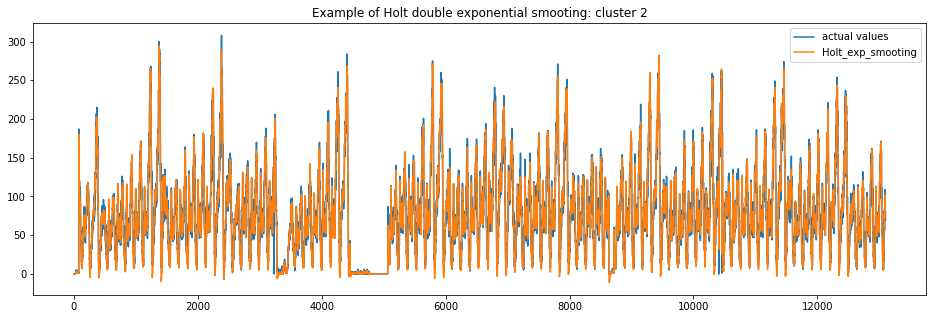

In [57]:
i=2
plt.figure(figsize=(16,5))
# traning plot for cluste 'i'
plt.plot(np.arange(len(cumulative_test[i])), (cumulative_test[i]), label='actual values')
plt.plot(np.arange(len(double_exp_smooth_feat[i])), double_exp_smooth_feat[i], label='Holt_exp_smooting')
plt.title(f"Example of Holt double exponential smooting: cluster {i}")
plt.legend(loc='best')
plt.show()


### 3.2 Holt-Winter tripple exponential averaging


 https://grisha.org/blog/2016/02/17/triple-exponential-smoothing-forecasting-part-iii/  --- Code reference

In [58]:
# Holt-Winter tripple exponential

def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen

def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals


def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [59]:
# hyperparameter tuning

# removing top 5 values from each cluster for calculating MAPE and MSE
cumulative_test = [ regions_cum[i][5:] for i in range(40) ]

# Parameter initialisation
alpha = [0.1, 0.2, 0.3, 0.4, 0.5]
beta = [0.1, 0.12, 0.15, 0.20, 0.3]
gamma = [0.1,0.2,0.3,0.4]
season_len = [10,20,25]

# Storing all the results
result = []

for al in alpha:
    for b in beta:
        for g in gamma:
            for season in season_len:

                holt_winter_3_exp_smooth_feat = []
                
                # Holt winter feature for each cluster wise
                for r in range(0,40):
                    holt_wint_exp = triple_exponential_smoothing(regions_cum[r][0:13104], season, al, b, g, 0)
                    holt_winter_3_exp_smooth_feat.append(holt_wint_exp[5:])

                # calculating MAPE
                error = (sum(abs(np.subtract(np.array(cumulative_test).flatten(), np.array(holt_winter_3_exp_smooth_feat).flatten()))))/len(np.array(holt_winter_3_exp_smooth_feat).flatten())
                y_ = sum(np.array(cumulative_test).flatten())/len(np.array(holt_winter_3_exp_smooth_feat).flatten())
                mape_3_exp = error/y_

                # calculating MSE
                mse_3_exp = sum((np.subtract(np.array(cumulative_test).flatten(), np.array(holt_winter_3_exp_smooth_feat).flatten()))**2.0) / len(np.array(holt_winter_3_exp_smooth_feat).flatten())
                    
                # Storing results
                result.append(([al, b, g, season],(mape_3_exp, mse_3_exp)))


In [60]:
# Finding Optimal hyperparameter
mape_res=[]
for i in range(len(result)):
    mape_res.append(result[i][1][0])
    
result_dataframe = pd.DataFrame(result, columns=["_alpha  ,_beta  ,_gamma  ,_season_len","_MAPE   ,_MSE"])
print("Optimal_hyperparameter: \n")
print(result_dataframe.iloc[np.argmin(mape_res)])

Optimal_hyperparameter: 

_alpha  ,_beta  ,_gamma  ,_season_len                          [0.5, 0.1, 0.4, 10]
_MAPE   ,_MSE                            (0.05073852849780103, 24.983657477980596)
Name: 249, dtype: object


In [61]:
# Using Optimal hyperparameter for holt-winter feature transform
alpha = 0.5
beta = 0.1
gamma = 0.4
season_len = 10


holt_winter_3_exp_smooth_feat = []

for r in range(0,40):
    holt_wint_exp = triple_exponential_smoothing(regions_cum[r][0:13104], season_len, alpha, beta, gamma, 0)
    holt_winter_3_exp_smooth_feat.append(holt_wint_exp[5:])
    
# calculating MAPE
error = (sum(abs(np.subtract(np.array(cumulative_test).flatten(), np.array(holt_winter_3_exp_smooth_feat).flatten()))))/len(np.array(holt_winter_3_exp_smooth_feat).flatten())
y_ = sum(np.array(cumulative_test).flatten())/len(np.array(holt_winter_3_exp_smooth_feat).flatten())
mape_3_exp = error/y_

# calculating MSE
mse_3_exp = sum((np.subtract(np.array(cumulative_test).flatten(), np.array(holt_winter_3_exp_smooth_feat).flatten()))**2.0) / len(np.array(holt_winter_3_exp_smooth_feat).flatten())


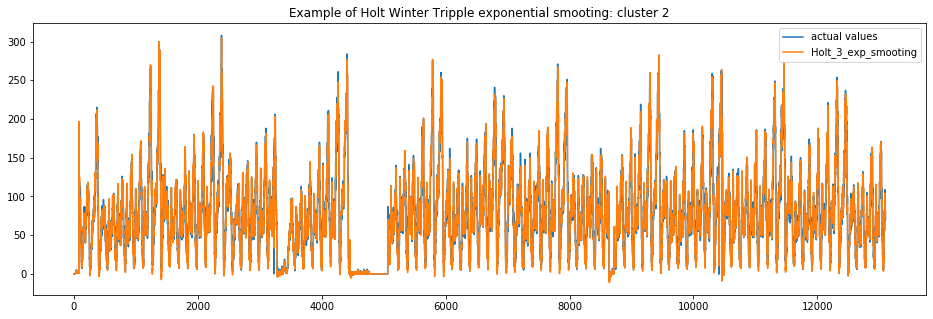

In [62]:
i=2
plt.figure(figsize=(16,5))
# traning plot for cluste 'i'
plt.plot(np.arange(len(cumulative_test[i])), (cumulative_test[i]), label='actual values')
plt.plot(np.arange(len(holt_winter_3_exp_smooth_feat[i])), holt_winter_3_exp_smooth_feat[i], label='Holt_3_exp_smooting')
plt.title(f"Example of Holt Winter Tripple exponential smooting: cluster {i}")
plt.legend(loc='best')
plt.show()


In [63]:
print ("Error Metric Matrix (Forecasting Methods) - MAPE & MSE")
print ("--------------------------------------------------------------------------------------------------------")
print ("holt-winter tripple exponential Averages (Values) -      MAPE: ",mape_3_exp,"      MSE: ",mse_3_exp)
print ("holt double exponential Averages (Values) -              MAPE: ",mape_2_exp,"       MSE: ",mse_2_exp)

Error Metric Matrix (Forecasting Methods) - MAPE & MSE
--------------------------------------------------------------------------------------------------------
holt-winter tripple exponential Averages (Values) -      MAPE:  0.05073852849780103       MSE:  24.983657477980596
holt double exponential Averages (Values) -              MAPE:  0.10268183636675085        MSE:  104.46471317931922


### 3.3 Train Test Split of Additional feature

In [64]:
# Train Test Split of Holt Double Exponential Averages
train_holt_2_exp_smooth_feat = [(double_exp_smooth_feat)[i][:9169] for i in range(40)] 
test_holt_2_exp_smooth_feat = [(double_exp_smooth_feat)[i][9169:] for i in range(40)] 

# 'holtz double exponential' 
# the above contains values in the form of list of lists (i.e. list of values of each region), here we make all of them in one list for 'holtz double exponential' feture
train_new_holt_2_exp_features = []
for i in range(0,40):
    train_new_holt_2_exp_features.extend(train_holt_2_exp_smooth_feat[i])
test_new_holt_2_exp_features = []
for i in range(0,40):
    test_new_holt_2_exp_features.extend(test_holt_2_exp_smooth_feat[i])
 

In [65]:
# train and test split of holtz winter tripple exponential feature
train_holt_winter_3_exp = [(holt_winter_3_exp_smooth_feat)[i][:9169] for i in range(40)]                    
test_holt_winter_3_exp = [(holt_winter_3_exp_smooth_feat)[i][9169:] for i in range(40)] 

#holtz winter 3  exponential
# the above contains values in the form of list of lists (i.e. list of values of each region), here we make all of them in one list for 'holtz winter exponential' feture
train_new_holtz_wint_3_exp_features = []
for i in range(0,40):
    train_new_holtz_wint_3_exp_features.extend(train_holt_winter_3_exp[i])
test_new_holtz_wint_3_exp_features = []
for i in range(0,40):
    test_new_holtz_wint_3_exp_features.extend(test_holt_winter_3_exp[i])


In [66]:
# Adding additional feature into dataframe    
df_train['holt_2exp_feature'] = train_new_holt_2_exp_features
df_train['holt_winter_3exp_feature'] = train_new_holtz_wint_3_exp_features
print("Train dataframe shape: ",df_train.shape)

df_test['holt_2exp_feature'] = test_new_holt_2_exp_features
df_test['holt_winter_3exp_feature'] = test_new_holtz_wint_3_exp_features
print("Test dataframe shape: ",df_test.shape)
df_test.head()

Train dataframe shape:  (366760, 21)
Test dataframe shape:  (157200, 21)


,ft_5,ft_4,ft_3,ft_2,ft_1,amp1,amp2,amp3,amp4,amp5,...,freq2,freq3,freq4,freq5,lat,lon,weekday,exp_avg,holt_2exp_feature,holt_winter_3exp_feature
0,143.0,145.0,119.0,113.0,124.0,387761.0,91160.781939,91160.781939,17509.351171,17509.351171,...,0.499521,0.499282,0.499042,0.498803,40.776228,-73.982119,4,121,126.315098,121.378441
1,145.0,119.0,113.0,124.0,121.0,387761.0,91160.781939,91160.781939,17509.351171,17509.351171,...,0.499521,0.499282,0.499042,0.498803,40.776228,-73.982119,4,120,119.462679,129.417436
2,119.0,113.0,124.0,121.0,131.0,387761.0,91160.781939,91160.781939,17509.351171,17509.351171,...,0.499521,0.499282,0.499042,0.498803,40.776228,-73.982119,4,127,117.612721,114.301626
3,113.0,124.0,121.0,131.0,110.0,387761.0,91160.781939,91160.781939,17509.351171,17509.351171,...,0.499521,0.499282,0.499042,0.498803,40.776228,-73.982119,4,115,126.998237,116.252595
4,124.0,121.0,131.0,110.0,116.0,387761.0,91160.781939,91160.781939,17509.351171,17509.351171,...,0.499521,0.499282,0.499042,0.498803,40.776228,-73.982119,4,115,127.429617,135.451284


## 3.4 Modeling: After adding additional feature 

### Using Linear Regression

In [67]:
## Hyper Parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

clf_lin_reg = Lasso(alpha=1.0)

param={'alpha':[0.001,0.01,0.1,1,10]}
gscv=GridSearchCV(estimator=clf_lin_reg, param_grid = param, scoring='neg_mean_absolute_error', n_jobs=-1,verbose=10)
gscv.fit(df_train, tsne_train_output)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:   23.2s remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:   32.9s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:   42.8s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   52.3s remaining:   45.8s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:   58.1s remaining:   29.1s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  1.1min remaining:   16.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=10)

In [68]:
print("Best Param: ",gscv.best_params_)
print("\nBest Score: ",-gscv.best_score_)

Best Param:  {'alpha': 0.1}

Best Score:  2.3855348430384375


In [64]:
# Traning Using Optimal Parameter
from sklearn.linear_model import Lasso
lr_reg=Lasso(alpha=0.1).fit(df_train, tsne_train_output)

y_pred = lr_reg.predict(df_test)
lr_test_predictions = [round(value) for value in y_pred]
y_pred = lr_reg.predict(df_train)
lr_train_predictions = [round(value) for value in y_pred]

print("Train MAPE : ",(mean_absolute_error(tsne_train_output, lr_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
print("Test MAPE : ",(mean_absolute_error(tsne_test_output, lr_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))

Train MAPE :  0.0387738969024487
Test MAPE :  0.03493433401929968


### Using Random Forest Regressor

In [70]:
## Hyper Parameter tuning using random search
from sklearn.model_selection import RandomizedSearchCV

clf_rf = RandomForestRegressor(max_features='sqrt',max_depth=None, n_estimators=40, n_jobs=-1)
param={'max_depth':[3,5,10,15,30],"n_estimators":[20,50,100,200,500]}

rscv= RandomizedSearchCV(estimator = clf_rf, param_distributions = param, scoring='neg_mean_absolute_error', n_jobs=-1,verbose=10)
rscv.fit(df_train, tsne_train_output)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  6.4min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  6.8min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  7.3min remaining:   48.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.6min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=40, n_jobs=-1,
                                                   oob_score=False,
                                                   random_state=No

In [71]:
print("Best Param: ",rscv.best_params_)
print("\nBest Score: ",-rscv.best_score_)

Best Param:  {'n_estimators': 500, 'max_depth': 30}

Best Score:  2.6191153166237626


In [65]:
#Traning Using Optimal Hyperparameter
regr1 = RandomForestRegressor(max_features='sqrt',max_depth=30, n_estimators=500, n_jobs=-1)
regr1.fit(df_train, tsne_train_output)

# Predicting on test data using our trained random forest model 

# the models regr1 is already hyper parameter tuned
# the parameters that we got above are found using grid search
y_pred = regr1.predict(df_test)
rndf_test_predictions = [round(value) for value in y_pred]
y_pred = regr1.predict(df_train)
rndf_train_predictions = [round(value) for value in y_pred]


print("Train MAPE : ",(mean_absolute_error(tsne_train_output, rndf_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
print("Test MAPE : ",(mean_absolute_error(tsne_test_output, rndf_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))

Train MAPE :  0.013369995703600486
Test MAPE :  0.037977358077754604


Index(['ft_5', 'ft_4', 'ft_3', 'ft_2', 'ft_1', 'amp1', 'amp2', 'amp3', 'amp4',
       'amp5', 'freq1', 'freq2', 'freq3', 'freq4', 'freq5', 'lat', 'lon',
       'weekday', 'exp_avg', 'holt_2exp_feature', 'holt_winter_3exp_feature'],
      dtype='object')
[4.10266989e-02 4.68910421e-02 8.16174639e-02 9.21024551e-02
 1.16445305e-01 1.07856249e-02 3.35777926e-03 4.87201869e-03
 3.03248110e-03 2.87230813e-03 3.90639136e-05 3.98205440e-05
 4.18543337e-05 3.97779159e-05 4.17126466e-05 5.06493314e-04
 5.51738386e-04 3.55574382e-04 1.54004671e-01 1.75515509e-01
 2.65860607e-01]


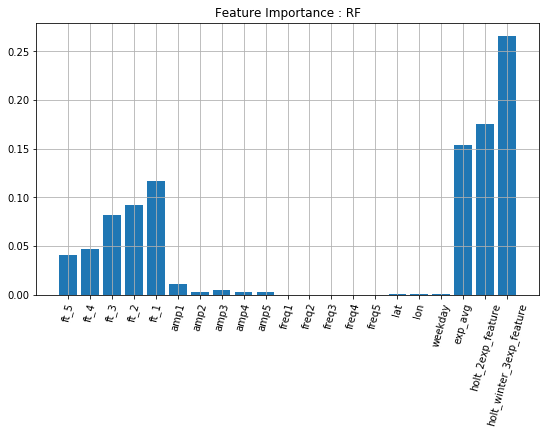

In [73]:
#feature importances based on analysis using random forest
print (df_train.columns)
print (regr1.feature_importances_)

plt.figure(figsize=(9,5))
plt.title("Feature Importance : RF")
plt.bar(df_train.columns,regr1.feature_importances_)
plt.xticks(np.arange(len(df_train.columns)),df_train.columns,rotation=75)
plt.grid()
plt.show()

### Using XgBoost Regressor

In [ ]:
## Hyper Parameter tuning using random search
from sklearn.model_selection import RandomizedSearchCV

clf_xgb = xgb.XGBRegressor(learning_rate =0.1,n_estimators=1000,max_depth=3, nthread=-1)

param={'max_depth':[3,5,10,15,30],"n_estimators":[100,200,500,1000],"learning_rate":[1,0.1,0.01]}

rscv= RandomizedSearchCV(estimator = clf_xgb, param_distributions = param, scoring='neg_mean_absolute_error', n_jobs=1,verbose=10)
rscv.fit(df_train, tsne_train_output)

In [ ]:
## Hyper Parameter tuning using random search
from sklearn.model_selection import RandomizedSearchCV

clf_xgb = xgb.XGBRegressor(learning_rate =0.1,n_estimators=1000,max_depth=3, nthread=-1)

param={'max_depth':[3,5,10,15,30],"n_estimators":[100,200,500,1000],"learning_rate":[1,0.1,0.01]}

rscv= RandomizedSearchCV(estimator = clf_xgb, param_distributions = param, scoring='neg_mean_absolute_error', n_jobs=1,verbose=10)
rscv.fit(df_train, tsne_train_output)

In [75]:
print("Best Param: ",rscv.best_params_)
print("\nBest Score: ",-rscv.best_score_)

Best Param:  {'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.01}

Best Score:  2.218369189599684


In [66]:
# Traninng with optimal Hyperparameter

x_model = xgb.XGBRegressor(
 learning_rate =0.01,
 n_estimators=500,
 max_depth=10,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 reg_alpha=200, reg_lambda=200,
 colsample_bytree=0.8,nthread=4)

x_model.fit(df_train, tsne_train_output)

#predicting with our trained Xg-Boost regressor
# the models x_model is already hyper parameter tuned
# the parameters that we got above are found using grid search

y_pred = x_model.predict(df_test)
xgb_test_predictions = [round(value) for value in y_pred]
y_pred = x_model.predict(df_train)
xgb_train_predictions = [round(value) for value in y_pred]


print("Train MAPE : ",(mean_absolute_error(tsne_train_output, xgb_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
print("Test MAPE : ",(mean_absolute_error(tsne_test_output, xgb_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))

[16:32:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train MAPE :  0.03919242740659407
Test MAPE :  0.03906713008882744


<Figure size 648x360 with 0 Axes>

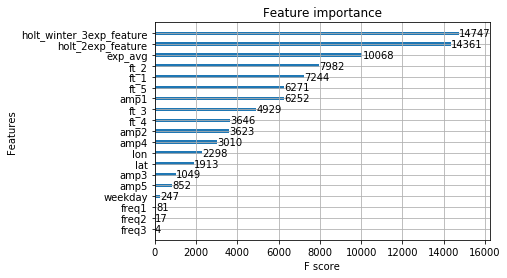

In [77]:
# Feature Importance of XGBoost Regressor
from xgboost import plot_importance
plt.figure(figsize=(9,5))
plot_importance(x_model,height=0.3)
plt.show()

### Result

In [67]:
train_mape=[]
test_mape=[]

train_mape.append((mean_absolute_error(tsne_train_output,df_train['ft_1'].values))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output,df_train['exp_avg'].values))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output,df_train['holt_2exp_feature'].values))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output,df_train['holt_winter_3exp_feature'].values))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output, lr_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output,rndf_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output, xgb_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))



test_mape.append((mean_absolute_error(tsne_test_output, df_test['ft_1'].values))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, df_test['exp_avg'].values))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, df_test['holt_2exp_feature'].values))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, df_test['holt_winter_3exp_feature'].values))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, lr_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, rndf_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, xgb_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))


### Error Metric Matrix

In [68]:
# include onle 3 exp
print ("Error Metric Matrix (Tree Based Regression Methods) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Baseline Model -                                         Train: ",train_mape[0],"      Test: ",test_mape[0])
print ("Exponential Averages Forecasting -                       Train: ",train_mape[1],"      Test: ",test_mape[1])
print ("Holt Double Exponential Averages Forecasting -           Train: ",train_mape[2],"      Test: ",test_mape[2])
print ("Holt Wint Tripple Exponential Averages Forecasting -     Train: ",train_mape[3],"      Test: ",test_mape[3])
print ("Linear Regression + Feature Eng.-                       Train: ",train_mape[4],"      Test: ",test_mape[4])
print ("Random Forest Regression + Feature Eng.-                 Train: ",train_mape[5],"      Test: ",test_mape[5])
print ("XgBoost Regression + Feature Eng.-                       Train: ",train_mape[6],"      Test: ",test_mape[6])
print ("--------------------------------------------------------------------------------------------------------")

Error Metric Matrix (Tree Based Regression Methods) -  MAPE
--------------------------------------------------------------------------------------------------------
Baseline Model -                                         Train:  0.14870666996426116       Test:  0.14225522601041551
Exponential Averages Forecasting -                       Train:  0.14121603560900353       Test:  0.13490049942819257
Holt Double Exponential Averages Forecasting -           Train:  0.10413810004833247       Test:  0.09959478141081789
Holt Wint Tripple Exponential Averages Forecasting -     Train:  0.05160889036066572       Test:  0.04889349525540393
Linear Regression + Feature Eng.-                       Train:  0.0387738969024487       Test:  0.03493433401929968
Random Forest Regression + Feature Eng.-                 Train:  0.013369995703600486       Test:  0.037977358077754604
XgBoost Regression + Feature Eng.-                       Train:  0.03919242740659407       Test:  0.03906713008882744
---------

# Conclusion

Best MAPE score is 0.034  using Linear regression on all the features.

Adding Holt double and triple Exponential smoothing feaure is definitely improved the model in the great way. 


END :)